#  MAP 554 / TP1 -  Lab 1: Gradient-based optimization


This notebook is written as an introduction to gradient-based optimization with Python. 

This notebook consists of three parts: 
- Design of a steepest descent algorithm
- Implementation of a linear search for step size search
- Use of library `Scipy` for optimization
- Several exercices

## 0- Definition of test functions
`Parabola`: 1D parabolic function  $z \rightarrow z^2$ 

`Rosenbrock`: 2D function $\mathbf{z} \rightarrow 100\times(z_2-z_1^2)^2+(1-z_1)^2$

`Ackley`: 2D function $\mathbf{z} \rightarrow -20 \exp\left({-0.2 \sqrt{0.5(z_1^2+z_2^2)}}\right) - \exp\left(0.5\cos(2\pi z_1) + 0.5\cos(2\pi z_2)\right) + e + 20$


In [1]:
# Support for maths
import numpy as np

def Parabole(z):
    return z**2

def Rosenbrock(z):
    #z1 = z[0] # useless
    #z2 = z[1]
    return 100*(z[1]-z[0]**2)**2+(1-z[0])**2

def compos(z):
    return Parabole(Rosenbrock(z))

def Ackley(z):
    return -20 * np.exp(-0.2*np.sqrt(0.5*(z[0]**2+z[1]**2))) - np.exp(0.5*np.cos(2*np.pi*z[0])+0.5*np.cos(2*np.pi*z[1])) + np.exp(1) + 20.

The gradient of the different functions will be computed thanks to the package `Autograd`.

In [2]:
#Automatic gradient computation
import autograd
import autograd.numpy as np

#definition of functions for gradient
nabla_Parabole=autograd.grad(Parabole)

nabla_Rosenbrock=autograd.grad(Rosenbrock)

nabla_Ackley=autograd.grad(Ackley)

nabla_compos=autograd.grad(compos)

Optima for the different functions

In [3]:
Optimum_Parabole = 0.
Optimum_Rosenbrock = np.array([1., 1.])
Optimum_Ackley = np.array([0., 0.])

Visualization of 2D functions with the package `matplotlib`.

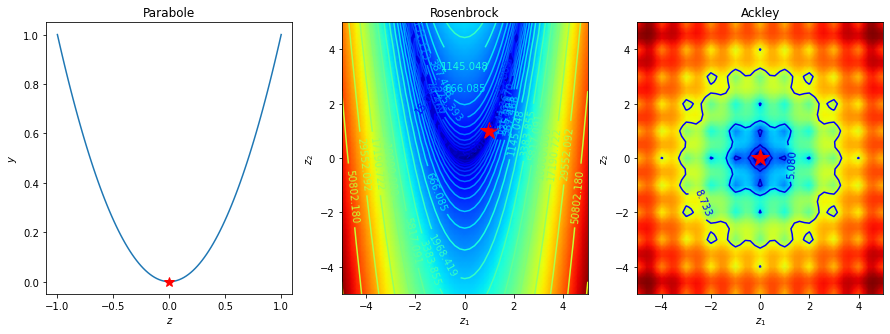

In [6]:
# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

##### Plot Parabola #######
X_parabole=np.linspace(-1,1,100)
Y_parabole=np.array([Parabole(x) for x in X_parabole])
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(X_parabole,Y_parabole)
plt.plot(Optimum_Parabole,Parabole(Optimum_Parabole), 'r*', markersize=10)
plt.xlabel('$z$')
plt.ylabel('$y$')
plt.title('Parabole')

##### Plot Contour plot Rosenbrock & Ackley#######
from matplotlib.colors import LogNorm,PowerNorm
import matplotlib.colors as colors
xmin, xmax, xstep = -5.,5., .2
ymin, ymax, ystep = -5., 5., .2
X, Y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
##### Plot Rosenbrock 2D ######
plt.subplot(132)
z_rosenbrock = np.array([Rosenbrock(np.array([x,y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z_rosenbrock  = z_rosenbrock.reshape(X.shape)
CS=plt.contour(X, Y, Z_rosenbrock, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.plot([Optimum_Rosenbrock[0]],[Optimum_Rosenbrock[1]], 'r*', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.pcolormesh(X,Y,Z_rosenbrock,shading='gouraud',norm=PowerNorm(gamma=0.3),cmap=plt.cm.jet)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('Rosenbrock')
#plt.colorbar()
##### Plot Ackley 2D ######
plt.subplot(133)
z_ackley = np.array([Ackley(np.array([x,y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z_ackley = z_ackley.reshape(X.shape)
CS=plt.contour(X, Y, Z_ackley, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.plot([Optimum_Ackley[0]],[Optimum_Ackley[1]], 'r*', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.pcolormesh(X,Y,Z_ackley,shading='gouraud',cmap=plt.cm.jet)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('Ackley')

#plt.colorbar()
plt.show()

3D view of Rosenbrock and Ackley

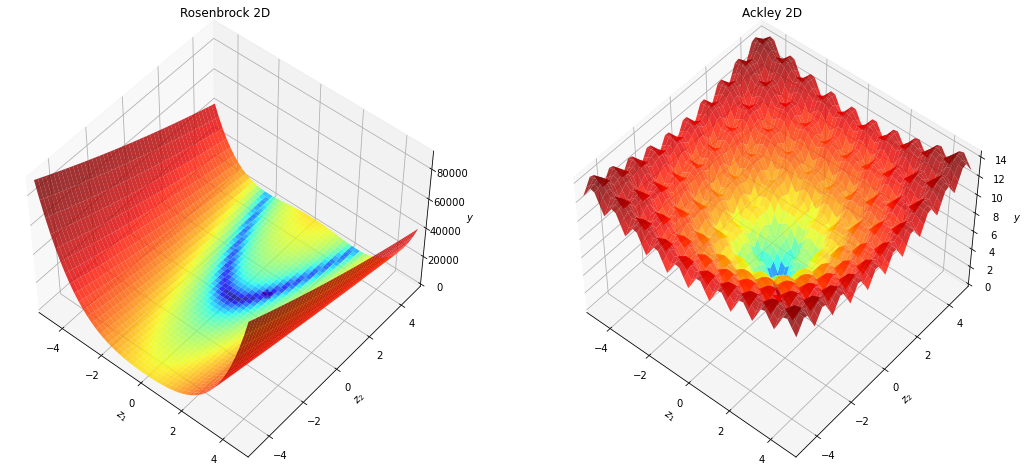

In [7]:
# import 3D vizualization tools
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))

###### Rosenbrock 3D Vizualization######
ax1 = fig.add_subplot(121,projection='3d', elev=50, azim=-50)
ax1.plot_surface(X, Y, Z_rosenbrock , norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax1.plot([Optimum_Rosenbrock[0]],[Optimum_Rosenbrock[1]], [Rosenbrock(Optimum_Rosenbrock)], 'r*', markersize=10)
ax1.set_xlabel('$z_1$')
ax1.set_ylabel('$z_2$')
ax1.set_zlabel('$y$')

ax1.set_xlim((xmin, xmax))
ax1.set_ylim((ymin, ymax))
ax1.set_title('Rosenbrock 2D')

###### Ackley 3D Vizualization######
ax2 = fig.add_subplot(122,projection='3d', elev=50, azim=-50)

ax2.plot_surface(X, Y, Z_ackley , norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax2.plot([Optimum_Ackley[0]],[Optimum_Ackley[1]], [Ackley(Optimum_Ackley)], 'r*', markersize=10)
ax2.set_xlabel('$z_1$')
ax2.set_ylabel('$z_2$')
ax2.set_zlabel('$y$')

ax2.set_xlim((xmin, xmax))
ax2.set_ylim((ymin, ymax))
ax2.set_title('Ackley 2D')
plt.show()


## 1- Steepest Gradient descent
Basic algorithm of gradient based descent. The considered descent direction is $\mathbf{S}^{(k)} = -\nabla f(z^{(k)}) $ with $k$ le number of current iteration. The stepsize is noted $\alpha^{(k)}$. The update of the optimziation variables is performed as fallows:
$$\mathbf{z}^{(k+1)} = \mathbf{z}^{(k)} - \alpha^{(k)}\nabla f(z^{(k)})$$

`gd_steepest`: function to define which provides the $\mathbf{z}^{(k)}$. This function takes as arguments the initial point `z0`, the gradient computation function`grad`, the value of the stepsize `alpha` and the maximal number of iterations `max_iter`.

In [8]:
# Definition of steepest descent algorithm with constant step size
# The algorithm ends with the maximal number of iterations is reached
def gd_steepest(z0, grad, alpha, max_iter=100):
    
    #dimension de z
    d=z0.shape[0]
    zs = np.zeros((1 + max_iter,d))
    zs[0] = z0
    z = z0
    #boucle sur le nombre d'iterations
    for i in range(max_iter):
        #calcul du nouveau point
        z = z - alpha * grad(z)
        zs[i+1] = z
    return zs.T

In [9]:
#Definition of initial points
z0_parabole = np.array([0.9])
z0_rosenbrock = np.array([1.8,0.0])
z0_ackley = np.array([0.5,0.05])

#Definition of step size
alpha_parabole = 0.2
alpha_rosenbrock = 3e-4
alpha_ackley = 5e-4

In [10]:
# Run of optimization algorithm on different functions
gd_path_parabole = gd_steepest(z0_parabole,nabla_Parabole,alpha_parabole,max_iter=200)
gd_path_rosenbrock = gd_steepest(z0_rosenbrock,nabla_Rosenbrock,alpha_rosenbrock,max_iter=300)
gd_path_ackley = gd_steepest(z0_ackley,nabla_Ackley,alpha_ackley,max_iter=300)

Visualization of the gradient descent path

Text(0, 0.5, '$y$')

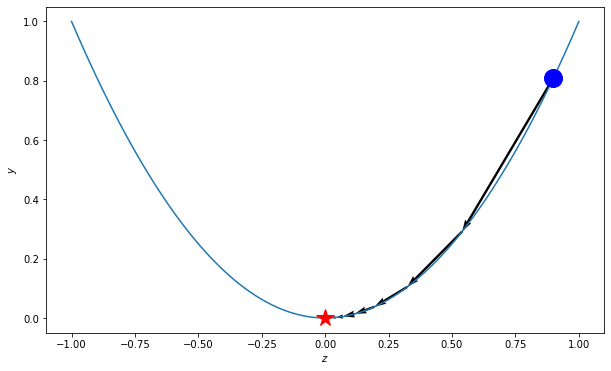

In [11]:
#### Path of the algorithme on the parabola function ####
f_parabole=np.array([Parabole(z) for z in gd_path_parabole])
path_parabole=np.concatenate((gd_path_parabole,f_parabole))
fig = plt.figure(figsize=(10, 6))
plt.plot(X_parabole,Y_parabole)
plt.plot(Optimum_Parabole,Parabole(Optimum_Parabole), 'r*', markersize=18)
plt.plot(z0_parabole,Parabole(z0_parabole), 'bo', markersize=18)
plt.quiver(path_parabole[0,:-1], path_parabole[1,:-1], path_parabole[0,1:]-path_parabole[0,:-1], path_parabole[1,1:]-path_parabole[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.xlabel('$z$')
plt.ylabel('$y$')

Text(0, 0.5, '$z_2$')

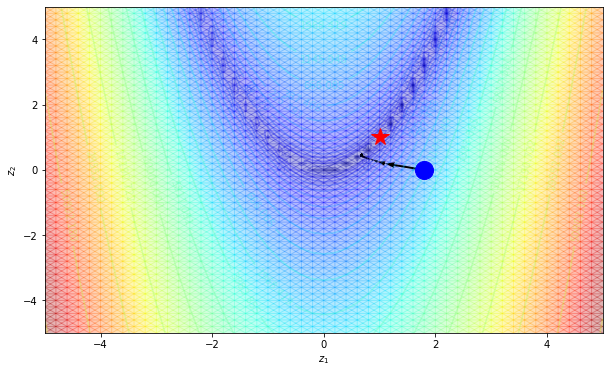

In [12]:
#### Path of the algorithm on the Rosenbrock function ####
fig, ax = plt.subplots(figsize=(10, 6))
CS=ax.contour(X, Y, Z_rosenbrock, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet,alpha=0.3)
ax.plot([Optimum_Rosenbrock[0]],[Optimum_Rosenbrock[1]], 'r*', markersize=18)
ax.plot([z0_rosenbrock[0]],[z0_rosenbrock[1]], 'bo', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.pcolormesh(X,Y,Z_rosenbrock,shading='gouraud',norm=PowerNorm(gamma=0.3),cmap=plt.cm.jet,alpha=0.3)
ax.quiver(gd_path_rosenbrock[0,:-1], gd_path_rosenbrock[1,:-1], gd_path_rosenbrock[0,1:]-gd_path_rosenbrock[0,:-1], gd_path_rosenbrock[1,1:]-gd_path_rosenbrock[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

Text(0, 0.5, '$z_2$')

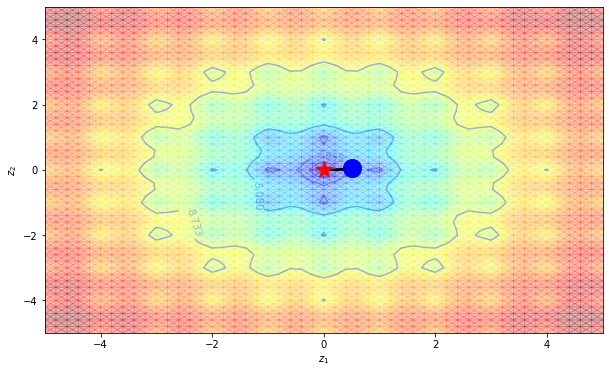

In [13]:
#### Path of the algorithm on the Ackley function ####
fig, ax = plt.subplots(figsize=(10, 6))
CS=ax.contour(X, Y, Z_ackley, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet,alpha=0.3)
ax.plot([Optimum_Ackley[0]],[Optimum_Ackley[1]], 'r*', markersize=18)
ax.plot([z0_ackley[0]],[z0_ackley[1]], 'bo', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.pcolormesh(X,Y,Z_ackley,shading='gouraud',cmap=plt.cm.jet,alpha=0.3)
ax.quiver(gd_path_ackley[0,:-1], gd_path_ackley[1,:-1], gd_path_ackley[0,1:]-gd_path_ackley[0,:-1], gd_path_ackley[1,1:]-gd_path_ackley[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

## Short exercice: Try different values of step size on the functions and conclude

### Résultats : 
On atteint le minimum global pour la parabole. Cependant, pour les fonctions rosenbrock et ackley, on tombe très facilement dans un minimum local. Il faut jouer sur la CI pour espérer avoir le minimum global. Augmenter trop fortement le pas peut provoquer la divergence de l'algorithme, et diminuer trop le pas peut rendre la convergecne très lente.

## 2- Linear search of  Wolfe
To avoid too large step size, verify the Armijo condition:
$$f\left(\textbf{z}+\alpha S\right)\leq f(\textbf{z})+\epsilon_1 \alpha\nabla f(\textbf{z})^T $$

To avoid too small step size, verify the curvature condition:
$$S^T \nabla f(\textbf{z}+\alpha S)\geq \epsilon_2 S^T \nabla f(\textbf{z}) $$


'Backtracking' algoritjm:

A step size $\alpha^*$ that verifies the Wolfe's conditions:
- 1 $i=0 ; \alpha_-=0 ; \alpha_+=+\infty;\epsilon_1=10^{-4};\epsilon_2=0.99 $;
- 2 While $\alpha_i$  does not verify the Wolfe's conditions:
    - If the step size is too large $\alpha_+=\alpha_i$ et $\alpha_{i+1}=\frac{\alpha_-+\alpha_+}{2}$
    - If the step size is too small $\alpha_-=\alpha_i$ et $\alpha_{i+1}=\frac{\alpha_-+\alpha_+}{2}$ si $\alpha_+<+\infty$; $\alpha_{i+1}=2\alpha_i$ else.
- 3 i=i+1
- 4 return $\alpha_i$


In [14]:
#Backtracking linear search
# arguments : current point z, function to be optimized, gradient of the function, initial value of the step size

def linear_search(z,func,grad,alpha0):
    alphamax=np.inf
    alphamin=0
    i=0
    alpha=alpha0
    epsilon_1 = 1e-4
    epsilon_2 = 0.99
    while  i<=100 and (func(z-alpha0*grad(z))>func(z) + epsilon_1 * np.dot(np.array([alpha0]*z.shape[0]).reshape(1,z.shape[0]),grad(z).reshape(z.shape[0],1))or\
                       np.dot(-grad(z).reshape(1,z.shape[0]),grad(z-alpha0*grad(z)).reshape(z.shape[0],1))<-epsilon_2*np.dot(grad(z).reshape(1,z.shape[0]),grad(z).reshape(z.shape[0],1))):
        if func(z-alpha0*grad(z))>func(z) + epsilon_1 *np.dot(np.array([alpha0]*z.shape[0]).reshape(1,z.shape[0]),grad(z).reshape(z.shape[0],1)):
            alphamax = alpha0
            alpha = (alphamax+alphamin)/2.
            
        else:
            if np.dot(-grad(z).reshape(1,z.shape[0]),grad(z-alpha0*grad(z)).reshape(z.shape[0],1))<-epsilon_2*np.dot(grad(z).reshape(1,z.shape[0]),grad(z).reshape(z.shape[0],1)):
                alphamin=alpha0 
                if alphamax<np.inf:
                    alpha = (alphamax+alphamin)/2.
                else:
                    alpha = 2*alpha0
        alpha0=alpha
        i=i+1
    return alpha

In [15]:
# Definition of steepest descent algorithm with linear search of step size
# arguments : initial point z0, the function to be optimized, the gradient of the function, the initial value of the step size, number maximal of iterations
def gd_steepest_variable_stepsize(z0, func, grad, alpha0, max_iter=100):
    d=z0.shape[0]
    zs = np.zeros((1 + max_iter,d))
    zs[0] = z0
    z = z0
    for i in range(max_iter):
        alpha = linear_search(z,func,grad,alpha0) # best step
        z = z - alpha * grad(z)
        zs[i+1] = z
    return zs.T

In [16]:
# Run of optimization algorithm on test functions
alpha0_parabole = 2.
alpha0_rosenbrock = 2.
alpha0_ackley = 2.
gd_path_parabole_variable_stepsize = gd_steepest_variable_stepsize(z0_parabole,Parabole,nabla_Parabole,alpha0_parabole,max_iter=50)
gd_path_rosenbrock_variable_stepsize = gd_steepest_variable_stepsize(z0_rosenbrock,Rosenbrock,nabla_Rosenbrock,alpha0_rosenbrock,max_iter=50)
gd_path_ackley_variable_stepsize = gd_steepest_variable_stepsize(z0_ackley,Ackley,nabla_Ackley,alpha0_ackley,max_iter=50)

Text(0, 0.5, '$y$')

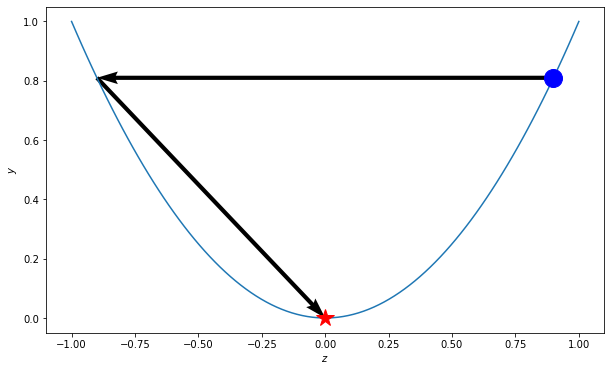

In [17]:
#### Path of the algorithm on the Parabola ####
f_parabole=np.array([Parabole(x) for x in gd_path_parabole_variable_stepsize])
path_parabole=np.concatenate((gd_path_parabole_variable_stepsize,f_parabole))
fig = plt.figure(figsize=(10, 6))
plt.plot(X_parabole,Y_parabole)
plt.plot(Optimum_Parabole,Parabole(Optimum_Parabole), 'r*', markersize=18)
plt.plot(z0_parabole,Parabole(z0_parabole), 'bo', markersize=18)
plt.quiver(path_parabole[0,:-1], path_parabole[1,:-1],\
           path_parabole[0,1:]-path_parabole[0,:-1],\
           path_parabole[1,1:]-path_parabole[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.xlabel('$z$')
plt.ylabel('$y$')

Text(0, 0.5, '$z_2$')

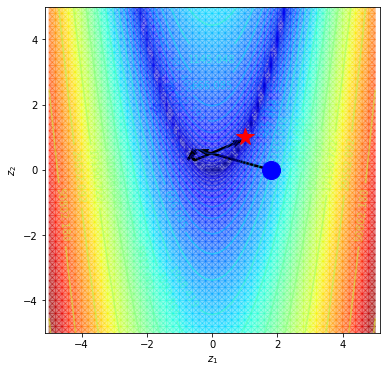

In [18]:
#### Path of the algorithm on the Rosenbrock function ####
fig, ax = plt.subplots(figsize=(6, 6))
CS=ax.contour(X, Y, Z_rosenbrock, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet,alpha=0.5)
ax.plot([Optimum_Rosenbrock[0]],[Optimum_Rosenbrock[1]], 'r*', markersize=18)
ax.plot([z0_rosenbrock[0]],[z0_rosenbrock[1]], 'bo', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.axis('equal')
plt.pcolormesh(X,Y,Z_rosenbrock,shading='gouraud',norm=PowerNorm(gamma=0.3),cmap=plt.cm.jet,alpha=0.5)
ax.quiver(gd_path_rosenbrock_variable_stepsize[0,:-1], gd_path_rosenbrock_variable_stepsize[1,:-1],\
          gd_path_rosenbrock_variable_stepsize[0,1:]-gd_path_rosenbrock_variable_stepsize[0,:-1],\
          gd_path_rosenbrock_variable_stepsize[1,1:]-gd_path_rosenbrock_variable_stepsize[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

Text(0, 0.5, '$z_2$')

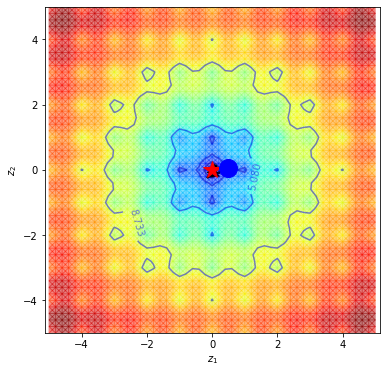

In [19]:
#### Path of the algorithm on the Ackley function####
fig, ax = plt.subplots(figsize=(6, 6))

CS=ax.contour(X, Y, Z_ackley, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet,alpha=0.5)
ax.plot([Optimum_Ackley[0]],[Optimum_Ackley[1]], 'r*', markersize=18)
ax.plot([z0_ackley[0]],[z0_ackley[1]], 'bo', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.axis('equal')
plt.pcolormesh(X,Y,Z_ackley,shading='gouraud',cmap=plt.cm.jet,alpha=0.5)
ax.quiver(gd_path_ackley_variable_stepsize[0,:-1], gd_path_ackley_variable_stepsize[1,:-1],\
          gd_path_ackley_variable_stepsize[0,1:]-gd_path_ackley_variable_stepsize[0,:-1],\
          gd_path_ackley_variable_stepsize[1,1:]-gd_path_ackley_variable_stepsize[1,:-1],\
          scale_units='xy', angles='xy', scale=1, color='k')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

## 3- Example of use of optimization algorithms with the package 'Scipy'

The package `Scipy.optimize` provides several gradient-based optimization algorithms.  

The classical syntax to perform minimization with `Scipy.optimize` is:

`scipy.optimize.minimize(fun, x0, args=(), method='Algorithme', jac=None, hess=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`
- `fun` : the function to be optimized.
- `x0`: initial point.
- `args`: Extra arguments for the objective function.
- `Method`: the used optimization algorithm:
        - ‘CG’ : Conjugate Gradient
        - ‘BFGS’ : Method of Broyden-Fletcher-Goldfarb-Shanno (approximation of the Hessian)
        - ‘Newton-CG’ : Newton method based on CG
        - ‘L-BFGS-B’: Limited memory bounded BFGS.
- 'tol' : tolerance of the algorithm (stopping criterion)

In [20]:
#import of the package
from scipy.optimize import minimize

#Run of 'BFGS' on the Rosenbrock function
res_Rosenbrock = minimize(Rosenbrock, x0=np.array([-4,4]), method='BFGS',
                          jac=nabla_Rosenbrock, tol=1e-20)
res_Rosenbrock

      fun: 0.0
 hess_inv: array([[0.49992155, 0.99986786],
       [0.99986786, 2.0047774 ]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 87
      nit: 66
     njev: 87
   status: 0
  success: True
        x: array([1., 1.])

In [21]:
#### Function used to save the path of the algorithm
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        path.append(np.copy(xk))

    return minimize_cb

path_ = [np.array([6,6])]

res_Rosenbrock = minimize(Rosenbrock, x0=np.array([-2,2]), method='BFGS',
               jac=nabla_Rosenbrock, tol=1e-20,callback=make_minimize_cb(path_))
gd_path_rosenbrock = np.array(path_).T

Text(0, 0.5, '$z_2$')

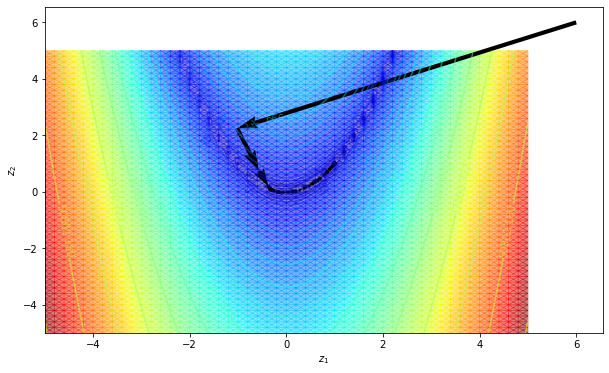

In [22]:
# Path of the optimization algorithm on the Rosenbrock function

fig, ax = plt.subplots(figsize=(10, 6))
CS=ax.contour(X, Y, Z_rosenbrock, levels=np.logspace(0, 8, 35), norm=LogNorm(), cmap=plt.cm.jet,alpha=0.5)
#ax.plot([Optimum_Rosenbrock[0]],[Optimum_Rosenbrock[1]], 'r*', markersize=18)
#ax.plot([z0_rosenbrock[0]],[z0_rosenbrock[1]], 'bo', markersize=18)
plt.clabel(CS,inline=1,fontsize=10)
plt.pcolormesh(X,Y,Z_rosenbrock,shading='gouraud',norm=PowerNorm(gamma=0.3),cmap=plt.cm.jet,alpha=0.5)
ax.quiver(gd_path_rosenbrock[0,:-1], gd_path_rosenbrock[1,:-1], gd_path_rosenbrock[0,1:]-gd_path_rosenbrock[0,:-1], gd_path_rosenbrock[1,1:]-gd_path_rosenbrock[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')

# Exercices

- Code the algorithms 'BFGS' and 'Newton-CG' on the Ackley function from different initializations
    
- Conclude

In [23]:

#Run of 'BFGS' on the Ackley function
print("\n BFGS")
res_Ackley = minimize(Ackley, x0=np.array([-2,2]), method='BFGS',
                          jac=nabla_Ackley, tol=1e-12)
print(res_Ackley)


#Run of 'Newton-CG' on the Ackley function
print("\n Newton-CG")
res_Ackley = minimize(Ackley, x0=np.array([-2,2]), method='Newton-CG',
                          jac=nabla_Ackley, tol=1e-12)
print(res_Ackley)



 BFGS
      fun: 3.5744518772576797
 hess_inv: array([[0.51015797, 0.48984203],
       [0.48984203, 0.51015797]])
      jac: array([-6.66133815e-16,  6.66133815e-16])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 5
     njev: 52
   status: 0
  success: True
        x: array([ 0.96847766, -0.96847766])

 Newton-CG
     fun: 6.559645375627877
     jac: array([ 9.4508037e-09, -9.4508037e-09])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 35
    nhev: 0
     nit: 3
    njev: 27
  status: 2
 success: False
       x: array([-1.97445199,  1.97445199])


# Conclusion :
We have no garuantee we are going to converge toward the 